In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [143]:
df = pd.read_csv('telco_customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1171,6270-OMFIW,Male,0,Yes,No,60,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,94.40,5610.25,Yes
2006,0224-HJAPT,Male,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,47.15,223.15,Yes
279,4130-MZLCC,Female,0,No,No,5,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),50.55,244.75,No
1205,6358-LYNGM,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,74.9,Yes
4727,3154-HMWUU,Male,0,Yes,No,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.8,No


In [144]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [145]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [146]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [147]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [148]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [149]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [150]:
df1.TotalCharges.dtypes

dtype('float64')

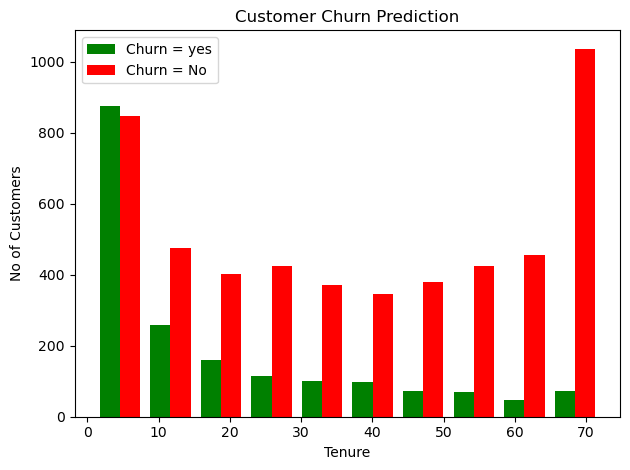

In [151]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn = yes', 'Churn = No'])
plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [152]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [153]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [154]:
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\2015265041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\2015265041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [155]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [156]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\4065720361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)
C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\4065720361.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes

In [157]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [158]:
df1['gender'].replace({'Male' : 0, 'Female' : 1}, inplace=True)

C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\1702527343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male' : 0, 'Female' : 1}, inplace=True)
C:\Users\smkal\AppData\Local\Temp\ipykernel_4092\1702527343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'

In [159]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [160]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [161]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1712,1,0,0,0,29,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
2768,1,0,0,0,12,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
6752,1,0,0,0,12,0,0,1,0,1,...,True,False,False,False,False,True,False,False,False,True
1011,1,0,1,1,71,0,0,1,1,0,...,True,False,False,False,False,True,False,False,False,True
6060,1,1,0,0,8,1,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False


In [162]:
df2 = df2.astype(int)

In [163]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
645,0,1,1,0,20,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
174,1,0,0,0,32,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1517,0,0,1,0,56,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1147,1,0,0,0,3,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2914,0,0,0,0,32,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [164]:
cols_to_scaale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scaale] = scaler.fit_transform(df2[cols_to_scaale])

In [165]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
616,0,0,0,0,0.098592,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
228,0,0,0,0,0.408451,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2699,1,1,0,0,0.464789,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [166]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
X_train.shape

(5625, 26)

In [169]:
X_test.shape

(1407, 26)

In [170]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,0.591549,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,1,0,1,0,0.760563,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,0,0,1,1,0.619718,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,1,0,1,1,0.760563,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5284,1,1,0,0,0.056338,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
6741,1,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5931,0,1,1,0,0.169014,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6766,0,0,1,1,0.183099,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [171]:
len(X_train.columns)

26

In [172]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 6ms/step - loss: 0.5160 - accuracy: 0.7383
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4362 - accuracy: 0.7884
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4248 - accuracy: 0.7954
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4201 - accuracy: 0.7973
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4173 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4159 - accuracy: 0.8064
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8037
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4144 - accuracy: 0.8030
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8046
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4121 - accura

In [173]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.7882


[0.45210081338882446, 0.7882018685340881]

In [174]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.00844225],
       [0.07822784],
       [0.44080967],
       [0.05792325],
       [0.42762205]], dtype=float32)

In [175]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int32

In [176]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [177]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [178]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

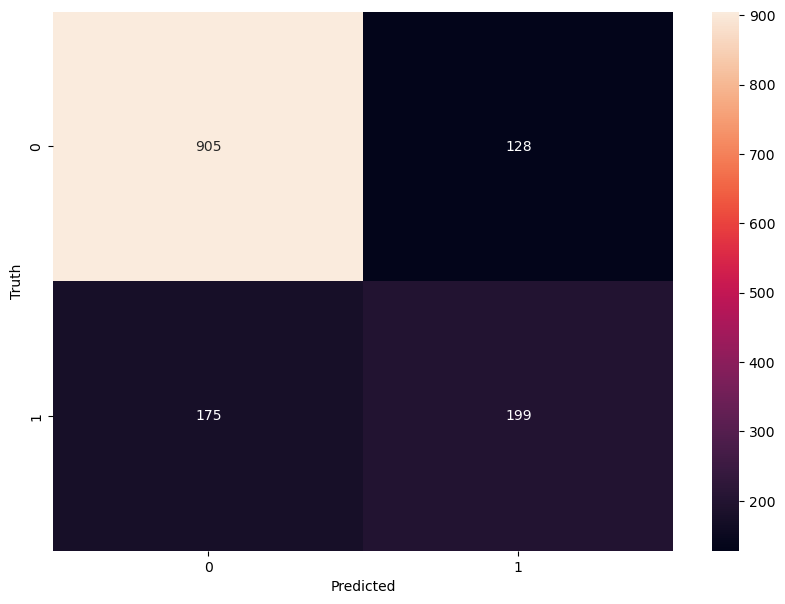

In [141]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')